# Algoritmos de optimización - Reto 1

Nombre: Victor Freixes Martinez<br> 
Github: <br>

## Torres de Hanoi con Divide y vencerás

Resuelve el problema de las [Torres de Hanoi](https://es.wikipedia.org/wiki/Torres_de_Han%C3%B3i) para un número arbitrario de fichas utilizando la técnica de divide y vencerás. 

In [36]:
# Torres de Hanoi

def torres_hanoi(fichas, torre_inicio, pivote, torre_fin):
    if fichas != 0:
        torres_hanoi(fichas-1,torre_inicio, torre_fin, pivote)
        print(f"Movemos ficha {fichas} desde {torre_inicio} hasta {torre_fin}")
        torres_hanoi(fichas-1, pivote, torre_inicio, torre_fin)


print("Numero de fichas: 5")
torres_hanoi(5,1,2,3)

print("Numero de fichas: 3")
torres_hanoi(3,1,2,3)

Numero de fichas: 5
Movemos ficha 1 desde 1 hasta 3
Movemos ficha 2 desde 1 hasta 2
Movemos ficha 1 desde 3 hasta 2
Movemos ficha 3 desde 1 hasta 3
Movemos ficha 1 desde 2 hasta 1
Movemos ficha 2 desde 2 hasta 3
Movemos ficha 1 desde 1 hasta 3
Movemos ficha 4 desde 1 hasta 2
Movemos ficha 1 desde 3 hasta 2
Movemos ficha 2 desde 3 hasta 1
Movemos ficha 1 desde 2 hasta 1
Movemos ficha 3 desde 3 hasta 2
Movemos ficha 1 desde 1 hasta 3
Movemos ficha 2 desde 1 hasta 2
Movemos ficha 1 desde 3 hasta 2
Movemos ficha 5 desde 1 hasta 3
Movemos ficha 1 desde 2 hasta 1
Movemos ficha 2 desde 2 hasta 3
Movemos ficha 1 desde 1 hasta 3
Movemos ficha 3 desde 2 hasta 1
Movemos ficha 1 desde 3 hasta 2
Movemos ficha 2 desde 3 hasta 1
Movemos ficha 1 desde 2 hasta 1
Movemos ficha 4 desde 2 hasta 3
Movemos ficha 1 desde 1 hasta 3
Movemos ficha 2 desde 1 hasta 2
Movemos ficha 1 desde 3 hasta 2
Movemos ficha 3 desde 1 hasta 3
Movemos ficha 1 desde 2 hasta 1
Movemos ficha 2 desde 2 hasta 3
Movemos ficha 1 desd

## Sucesión de Fibonacci

Cálcula el n-ésimo término de la [Sucesión de Fibonacci](https://es.wikipedia.org/wiki/Sucesi%C3%B3n_de_Fibonacci) mediante un algoritmo recursivo y otro iterativo. Representa gráficamente cómo crece el tiempo de cómputo en función del número de términos para ambos algoritmos. 

Termino 10 con recursion: 55 
Termino 10 con iteracion: 55 
Termino 23 con recursion: 28657 
Termino 23 con iteracion: 28657 


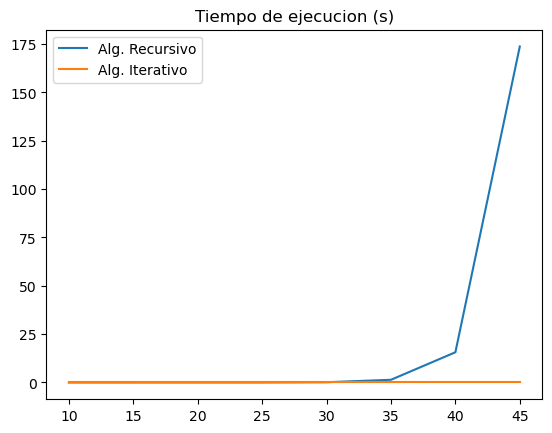

In [68]:
import matplotlib.pyplot as plt
import time

#Sucesión_de_Fibonacci
def fibonacci_rec(n):
    if n < 2:
        return n
    else:
        return (fibonacci_rec(n-1) + fibonacci_rec(n-2))

def fibonacci_iter(n):
    fib = [0 , 1]
    for i in range(2, n+1):
        fib.append(fib[i-1] + fib[i-2])
    return fib[n]

nesimo = 10
print(f"Termino {nesimo} con recursion: {fibonacci_rec(nesimo)} ")
print(f"Termino {nesimo} con iteracion: {fibonacci_iter(nesimo)} ")

nesimo = 23
print(f"Termino {nesimo} con recursion: {fibonacci_rec(nesimo)} ")
print(f"Termino {nesimo} con iteracion: {fibonacci_iter(nesimo)} ")

max = 45 

tiempos_rec = []
tiempos_iter = []
terminos = []

for i in range(10, max+1, 5):
    terminos.append(i)

    start = time.time() 
    fibonacci_iter(i)
    end = time.time() 
    tiempos_iter.append(end - start)

    start = time.time() 
    fibonacci_rec(i)
    end = time.time() 
    tiempos_rec.append(end - start)

plt.title("Tiempo de ejecucion (s)")
plt.plot(terminos, tiempos_rec, label="Alg. Recursivo")
plt.plot(terminos, tiempos_iter, label="Alg. Iterativo")
plt.legend()
plt.show()




En en caso del algoritmo iterativo el calculo es tan rapido que el tiempo sale 0.
Probando valores he visto que el tiempo es superior a 0 buscando los terminos por encima del 900, en este caso el recursivo es muy lento y por eso en la grafica se ha cortado a un valor muy inferior


## Devolución de cambio por técnica voraz

Resuelve el [Problema del Cambio de Moneda](https://es.wikipedia.org/wiki/Problema_de_cambio_de_monedas) utilizando una técnica voraz.

In [3]:
# Problema del cambio de moneda

#tipos de monedas disponibles y su cantidad
denominaciones = [(1,10),
                  (2,10),
                  (5,10),
                  (10,10),
                  (20,10),
                  (50,10),
                  (100,10),
                  (200,15)]


def cambiar(denom, valor):

    denom = sorted(denom, reverse=True) #ordenamos las monedas de mayor a menor valor
    cambio = []
    total_maquina = 0

    for i in range(len(denom)):
        total_maquina += denom[i][0]*denom[i][1] #calculamos el total de la maquina
    print(f"Total maquina: {total_maquina}")
    print(f"Total a cambiar: {valor}")
    if total_maquina < valor: return "No hay suficiente cambio"

    for i in range(len(denom)): # por cada denominacion calcularemos si podemos devolver algo
        moneda = denom[i][0]
        qty = 0;
        while valor >= denom[i][0] and denom[i][1] > 0: #si tenemos monedas y estas son de menor o igual valor al restante podemos devolver
            qty = qty + 1
            denom[i] = (moneda, denom[i][1] - 1)
            valor = valor - moneda

        if qty !=0: cambio.append((moneda,qty))
    if qty < valor: return "No se puede devolver el cambio"
    return cambio

#Devolvemos una lista con el tipo de moneda y la cantidad a devolver
print(cambiar(denominaciones, 21))
print(cambiar(denominaciones, 433))

Total maquina: 4880
Total a cambiar: 21
[(20, 1), (1, 1)]
Total maquina: 4880
Total a cambiar: 433
[(200, 2), (20, 1), (10, 1), (2, 1), (1, 1)]


## N-Reinas por técnica de vuelta atrás
Resuelve el [Problema de las N-Reinas](https://es.wikipedia.org/wiki/Problema_de_las_ocho_reinas) en un tablero de dimensión N mediante la técnica de la vuelta atrás (backtraking).

In [69]:
# Problema de las N-Reinas
def n_reinas(k, columna, diag45, diag135):
    if k == reinas:
        soluciones.append(solucion)
        print(f"{solucion}")
    else:
        for i in range(1,reinas+1):
            if (i not in columna) and ((i-k) not in diag45) and ((i+k) not in diag135):
                solucion[k] = i
                n_reinas(k+1,columna+[i],diag45+[i-k],diag135+[i+k])



reinas = 4  #Numero de reinas i tamaño del tablero
solucion = [None] * reinas
soluciones = []
n_reinas(0,[],[],[])
print(f"Total soluciones para {reinas} reinas: {len(soluciones)}")



reinas = 6
solucion = [None] * reinas
soluciones = []
n_reinas(0,[],[],[])
print(f"Total soluciones para {reinas} reinas: {len(soluciones)}")   

[2, 4, 1, 3]
[3, 1, 4, 2]
Total soluciones para 4 reinas: 2
[2, 4, 6, 1, 3, 5]
[3, 6, 2, 5, 1, 4]
[4, 1, 5, 2, 6, 3]
[5, 3, 1, 6, 4, 2]
Total soluciones para 6 reinas: 4
